In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(r'F:\Data Science Projects\Deep Learning\Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [18]:
x = df.iloc[:,3:13]
y = df.iloc[:,13]

In [19]:
geography = pd.get_dummies(x['Geography'],drop_first = True)
gender = pd.get_dummies(x['Gender'],drop_first = True)
gender

,Male
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,1
9997,0
9998,1


In [20]:
x = pd.concat([x,geography,gender],axis = 1)
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1


In [21]:
x = x.drop(['Geography','Gender'],axis = 1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [26]:
#import keras libraries and packages

In [27]:
import keras 

In [30]:
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [38]:
#initiating ANN 
classifier = Sequential()
#creating first hidden layer and input layer
classifier.add(Dense(units = 6,kernel_initializer = 'he_uniform',activation = 'relu',input_dim = 11 ))
classifier.add(Dense(units = 6,kernel_initializer = 'he_uniform',activation = 'relu' ))
classifier.add(Dense(units = 1,kernel_initializer = 'glorot_uniform',activation = 'sigmoid'))

In [39]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [40]:
#fitting the ANN to the training set
model_history = classifier.fit(x_train,y_train,validation_split = 0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 4s 4ms/step - loss: 0.5392 - accuracy: 0.7834 - val_loss: 0.4842 - val_accuracy: 0.7974
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4661 - accuracy: 0.7992 - val_loss: 0.4533 - val_accuracy: 0.7986
Epoch 3/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4411 - accuracy: 0.8018 - val_loss: 0.4403 - val_accuracy: 0.8042
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4264 - accuracy: 0.8097 - val_loss: 0.4301 - val_accuracy: 0.8069
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4134 - accuracy: 0.8147 - val_loss: 0.4215 - val_accuracy: 0.8133
Epoch 6/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4022 - accuracy: 0.8246 - val_loss: 0.4136 - val_accuracy: 0.8164
Epoch 7/100
536/536 [==============================] - 2s 5ms/step - loss: 0.3918 - accuracy: 0.8328 - val_loss: 0.4053 - val_accuracy: 0.8228

Epoch 58/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3298 - accuracy: 0.8653 - val_loss: 0.3563 - val_accuracy: 0.8591
Epoch 59/100
536/536 [==============================] - 3s 6ms/step - loss: 0.3297 - accuracy: 0.8625 - val_loss: 0.3565 - val_accuracy: 0.8576
Epoch 60/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3292 - accuracy: 0.8638 - val_loss: 0.3571 - val_accuracy: 0.8607
Epoch 61/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3289 - accuracy: 0.8619 - val_loss: 0.3575 - val_accuracy: 0.8588
Epoch 62/100
536/536 [==============================] - 2s 4ms/step - loss: 0.3292 - accuracy: 0.8645 - val_loss: 0.3567 - val_accuracy: 0.8569
Epoch 63/100
536/536 [==============================] - 3s 6ms/step - loss: 0.3297 - accuracy: 0.8628 - val_loss: 0.3558 - val_accuracy: 0.8618
Epoch 64/100
536/536 [==============================] - 3s 5ms/step - loss: 0.3288 - accuracy: 0.8636 - val_loss: 0.3556 - val_accuracy:

In [53]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


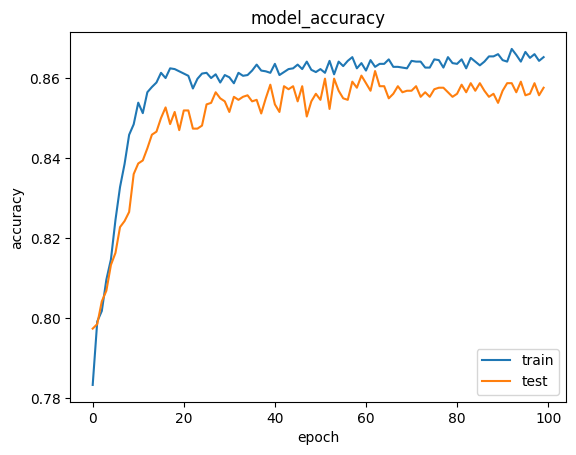

In [58]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc = 'lower right')
plt.show()

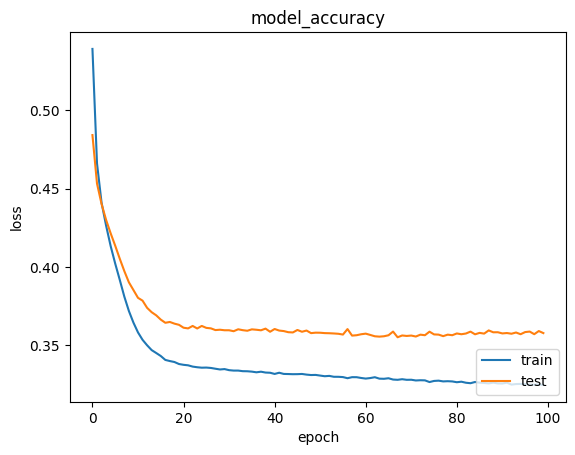

In [60]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc = 'lower right')
plt.show()

In [42]:
y_pred = classifier.predict(x_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 2ms/step


In [49]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1536,   59],
       [ 217,  188]], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
score

0.862